2. a) In this example, study a line graph with 10 nodes. 

Denote the i-th node state by Xi(t) and the set of possible states by C = {red,green}. At initialization, each node is red, i.e, Xi(t) = red for all i = 1,...,10. Every discrete time instance t, one node I(t), chosen uniformly at random, wakes up and updates its color.

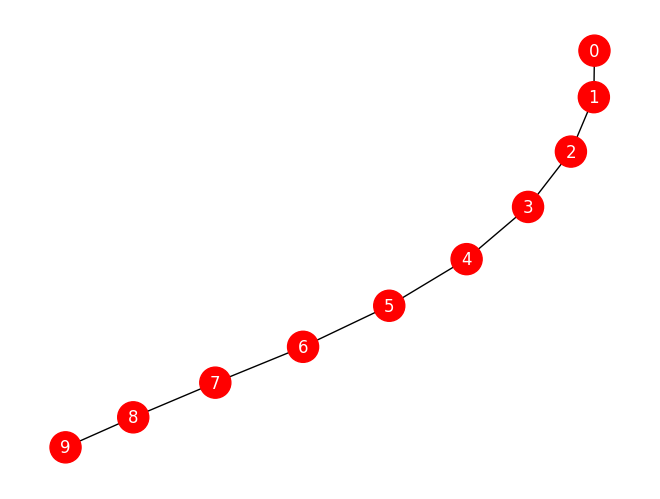

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rn

# Create an undirected line graph with 10 nodes
G = nx.path_graph(10)

#Possible colors= (red,green)
C=['red','green']
#At the beginning all the nodes are red
nx.set_node_attributes(G, C[0], 'state')

# Initialize weights
for u, v in G.edges():
    G[u][v]['weight'] = 1

colors= [G.nodes[node]["state"] for node in G.nodes]

# Draw the graph
nx.draw(G, with_labels=True, node_color=colors, node_size=500, font_color='white')
plt.show()


In [3]:
#Time to wake up is randomly and discrete
t=100

def cost(s, X_j):
        
        #calculate the cost
        #What is the cost of remain at the same color that the neighbor? 

        if X_j==s: 
            cost=1
        else: 
            cost=0 
        
        return cost

def probabilities(n, i,a,C):
     numerator= np.exp(-n*sum(G[i][j]['weight']*cost(a, G.nodes[j]['state']) for j in G.neighbors(i)))
     denominator= sum(np.exp(-n*sum(G[i][j]['weight']*cost(s, G.nodes[j]["state"]) for j in G.neighbors(i))) for s in C)
     return numerator/denominator
     
#Calculate the utility
def utility(G):
    return 1/2*sum(G[i][j]["weight"]*cost(G.nodes[i]["state"], G.nodes[j]["state"]) for i,j in G.edges())

def coloring(t): 
    
    U=[]

    for i in range(1,t+1): 
        n=i/50

        #Choose a random node
        node=rn.choice(list(G.nodes))
        print("The chosen node is ", node, "with color ", G.nodes[node]["state"])

        #Calculate the probabilities
        p_red = probabilities(n, node, C[0],C)
        p_green = probabilities(n, node, C[1],C)

        #Choose the biggest probability and update the color
        if p_red>p_green:
            G.nodes[node]["state"]=C[0]
        else: 
            G.nodes[node]["state"]=C[1]

        print(" The node ", node, " is now", G.nodes[node]["state"])

        U.append(utility(G))

    # Plot the potential function over time
    plt.plot(range(1, t + 1), U)
    plt.xlabel('Time step')
    plt.ylabel('Potential function U(t)')
    plt.title('Potential function over time')
    plt.show()
          

The chosen node is  6 with color  red
 The node  6  is now green
The chosen node is  4 with color  red
 The node  4  is now green
The chosen node is  2 with color  red
 The node  2  is now green
The chosen node is  9 with color  red
 The node  9  is now green
The chosen node is  2 with color  green
 The node  2  is now green
The chosen node is  3 with color  red
 The node  3  is now red
The chosen node is  2 with color  green
 The node  2  is now green
The chosen node is  4 with color  green
 The node  4  is now green
The chosen node is  7 with color  red
 The node  7  is now green
The chosen node is  4 with color  green
 The node  4  is now green
The chosen node is  3 with color  red
 The node  3  is now red
The chosen node is  2 with color  green
 The node  2  is now green
The chosen node is  3 with color  red
 The node  3  is now red
The chosen node is  4 with color  green
 The node  4  is now green
The chosen node is  0 with color  red
 The node  0  is now green
The chosen node is 

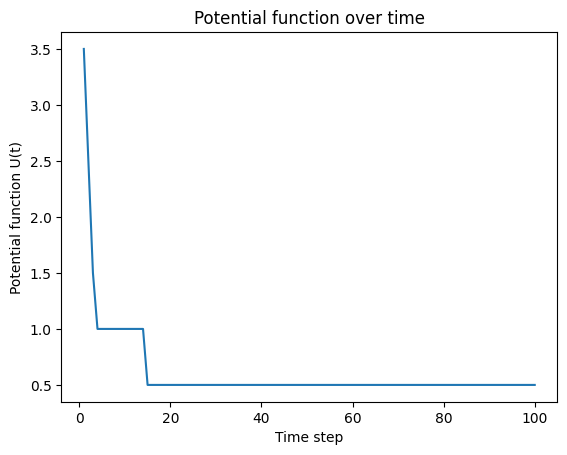

In [4]:
coloring(100)

The potential function is directly proportional to the cost of remaining the same color as a neighbor. As the nodes update their colors at each step of the simulation to ensure that all neighbors have different colors, the utility function, which measures how similar the colors of the neighbors are, tends to decrease.

['green', 'red', 'green', 'red', 'green', 'red', 'green', 'green', 'red', 'green']


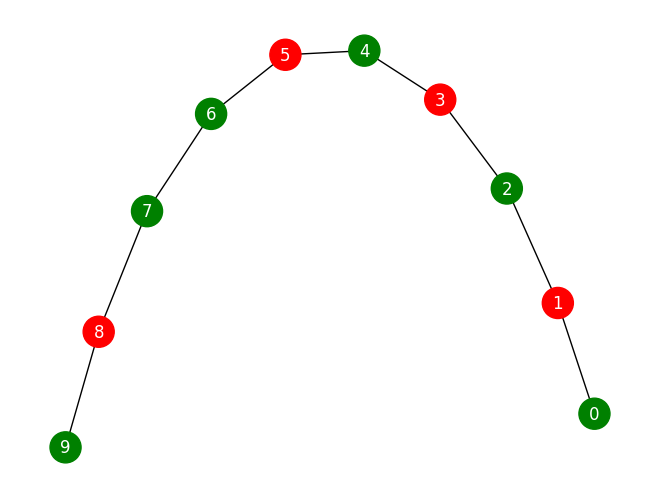

In [5]:
colors= [G.nodes[node]["state"] for node in G.nodes]
print(colors)
# Draw the graph
nx.draw(G, with_labels=True, node_color=colors, node_size=500, font_color='white')
plt.show()

2. b) Next, we use the coloring algorithm for the problem of assigning wifi-channels to routers.

The adjacency matrix of a network of 100 routers is given in wifi.mat and the routers’
coordinates are given in coord.mat. Here, a link between two nodes means that the two
routers are able to interfere with each other. The set of possible states is C = {1 : red,2 :
green,3 : blue,4 : yellow,5 : magenta,6 : cyan,7 : white,8 : black}, where colors represent
frequency bands

In [6]:
from scipy.io import loadmat
import scipy.io

In [7]:
adjency_matrix= loadmat('wifi.mat')
adjency_matrix=adjency_matrix["wifi"]

In [8]:
adjency_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
routers_coordinates= loadmat("coords.mat")
routers_coordinates=routers_coordinates['coords']

In [10]:
routers_coordinates

array([[0.34888796, 0.81307005],
       [0.75063211, 0.38038771],
       [0.78818735, 0.04624025],
       [0.80621182, 0.64056394],
       [0.00505843, 0.7431052 ],
       [0.95839369, 0.15886282],
       [0.6947375 , 0.81778261],
       [0.71211727, 0.07591448],
       [0.7102648 , 0.33903334],
       [0.43885267, 0.46587037],
       [0.98266215, 0.24169242],
       [0.99600785, 0.09093217],
       [0.29455854, 0.63840565],
       [0.77145444, 0.32313177],
       [0.62042212, 0.15423115],
       [0.24502331, 0.90430393],
       [0.11392656, 0.79326708],
       [0.01278799, 0.49282909],
       [0.46522384, 0.57174431],
       [0.96155569, 0.0780973 ],
       [0.43239753, 0.84449704],
       [0.69556575, 0.2198785 ],
       [0.06382515, 0.806252  ],
       [0.71679135, 0.7122611 ],
       [0.04660517, 0.87188755],
       [0.58861137, 0.54489133],
       [0.62447385, 0.96312156],
       [0.64817255, 0.48043383],
       [0.46275369, 0.22582013],
       [0.80355008, 0.34059533],
       [0.

In [11]:
# Create the graph 

def create_initial_graph(): 
    G1 = nx.from_numpy_array(adjency_matrix)

    #Possible states
    C={"red":1, "green":2, "blue":3, "yellow":4, "magenta":5, "cyan":6, "white":7, "black":8}
    colors= list(C.keys())
    #It is necesarry to assign a value to the color in order to calculate the cost funciton later

    #Arbitrary initial condition
    for i in range(len(G1.nodes)):
        G1.nodes[i]["state"]=rn.choice(list(C.keys()))

    print(G1.nodes[2]) 

    return G1, C, colors

In [12]:
G1, C, colors =create_initial_graph()

{'state': 'white'}


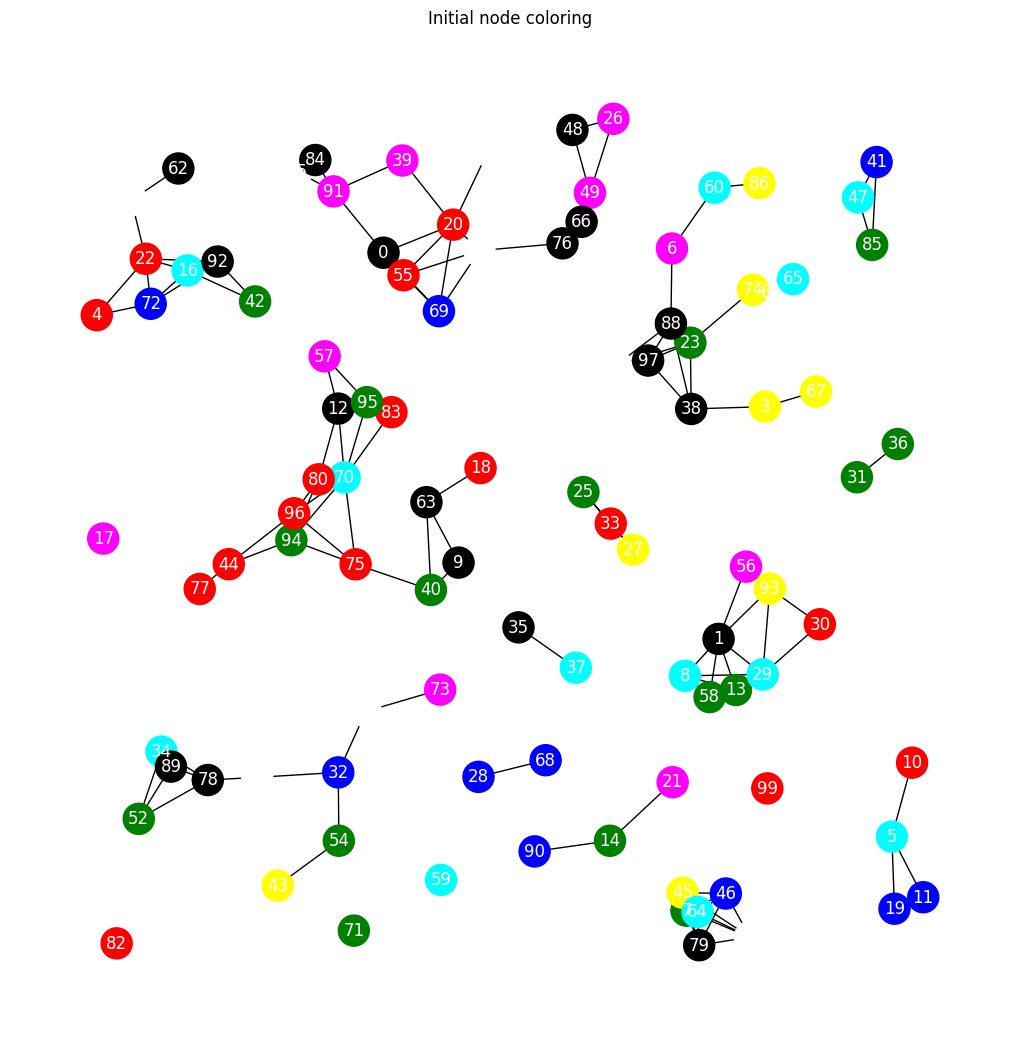

In [13]:
#Initial image
plt.figure(figsize=(10, 10))
pos = {i: (routers_coordinates[i, 0], routers_coordinates[i, 1]) for i in range(G1.number_of_nodes())}
node_colors = [G1.nodes[node]['state'] for node in G1.nodes]
nx.draw(G1, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')
plt.title('Initial node coloring')
plt.show()

In [14]:
#Cost function
def cost(s,X_j):
    
    if X_j==s: 
        cost=2
    elif(abs(X_j-s)==1):
        cost=1
    else: 
        cost=0
    return cost

#Probabilities function

def probabilities(n, i,a,C):
     numerator= np.exp(-n*sum(G1[i][j]['weight']*cost(C[a], C[G1.nodes[j]['state']]) for j in G1.neighbors(i)))
     denominator= sum(np.exp(-n*sum(G1[i][j]['weight']*cost(C[s],C[ G1.nodes[j]["state"]]) for j in G1.neighbors(i))) for s in C.keys())
     return numerator/denominator

#Utility function
def utility(G1):
    return 1/2*sum(G1[i][j]["weight"]*cost(C[G1.nodes[i]["state"]], C[G1.nodes[j]["state"]]) for i,j in G1.edges())

In [15]:
np.exp(-1), np.exp(-1000), np.exp(-500)

(0.36787944117144233, 0.0, 7.124576406741286e-218)

In [16]:
t=1000
def bands(t):
    
    U=[]
    for i in range(1,t+1):

        #Choose a random node
        node=rn.choice(list(G1.nodes))
        print("The chosen node is ", node, "with color ", G1.nodes[node]["state"])

        #update n
        n=i/50

        #Calculate the probabilities
        p_red = probabilities(n, node, colors[0],C)
        p_green = probabilities(n, node, colors[1],C)
        p_blue = probabilities(n, node, colors[2],C)
        p_yellow = probabilities(n, node, colors[3],C)
        p_magenta = probabilities(n, node, colors[4],C)
        p_cyan = probabilities(n, node, colors[5],C)
        p_white = probabilities(n, node, colors[6],C)
        p_black = probabilities(n, node, colors[7],C)

        #Choose the biggest probability and update the color
        probs=[p_red, p_green, p_blue, p_yellow, p_magenta, p_cyan, p_white, p_black]
        G1.nodes[node]["state"]=colors[np.argmax(probs)]
        print(" The node ", node, " is now", G1.nodes[node]["state"])

        U.append(utility(G1))
        
     # Plot the potential function over time
    plt.plot(range(1, t + 1), U)
    plt.xlabel('Time step')
    plt.ylabel('Potential function U(t)')
    plt.title('Potential function over time')
    plt.show()

    print(len(U))
    plt.plot(range(1, 600 + 1), U[:600])
    plt.xlabel('Time step')
    plt.ylabel('Potential function U(t)')
    plt.title('Potential function over time')
    plt.show()
          

The chosen node is  4 with color  red
 The node  4  is now magenta
The chosen node is  13 with color  green
 The node  13  is now yellow
The chosen node is  52 with color  green
 The node  52  is now red
The chosen node is  84 with color  black
 The node  84  is now red
The chosen node is  30 with color  red
 The node  30  is now red
The chosen node is  40 with color  green
 The node  40  is now blue
The chosen node is  45 with color  yellow
 The node  45  is now red
The chosen node is  81 with color  white
 The node  81  is now red
The chosen node is  29 with color  cyan
 The node  29  is now cyan
The chosen node is  56 with color  magenta
 The node  56  is now red
The chosen node is  94 with color  green
 The node  94  is now blue
The chosen node is  36 with color  green
 The node  36  is now yellow
The chosen node is  50 with color  white
 The node  50  is now blue
The chosen node is  68 with color  blue
 The node  68  is now red
The chosen node is  1 with color  black
 The node  1 

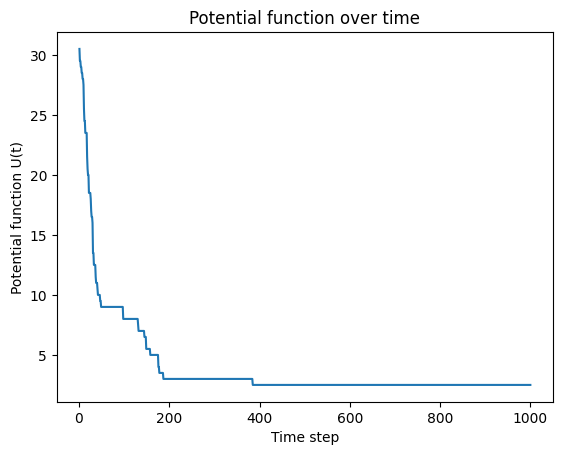

1000


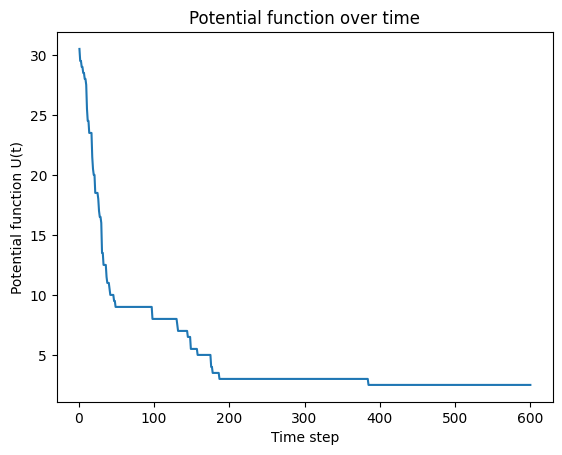

In [17]:
bands(1000)

We can observe that between 200-400 the potential function arrives to its minimum value and remain in this until the end of the simulation. 

Then, in a closer observation we can see that the potential funciton is decreasing because the probability of have the same color that the neighbour or to the next to this is decreasing at each time. 

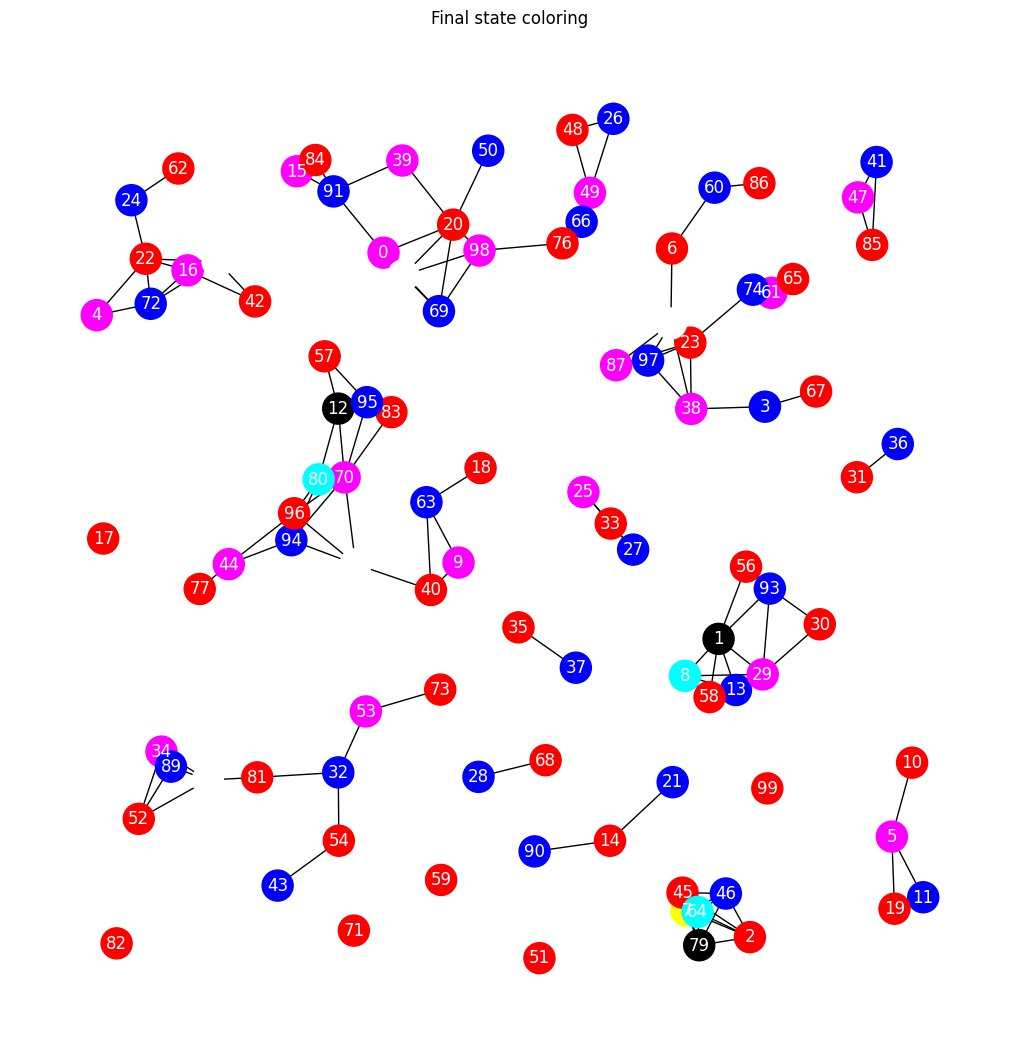

In [18]:
plt.figure(figsize=(10, 10))
pos = {i: (routers_coordinates[i, 0], routers_coordinates[i, 1]) for i in range(G1.number_of_nodes())}
node_colors = [G1.nodes[node]['state'] for node in G1.nodes]
nx.draw(G1, pos, with_labels=True, node_color=node_colors, node_size=500, font_color='white')
plt.title('Final state coloring')
plt.show()

2. c) Optional
Evaluate what happens for different choices of η(t), i.e., constant (with small and
large values), or other increasing functions η(t) etc.
Comment on what you observe.

In [19]:
G2, C2, colors2= create_initial_graph()

{'state': 'cyan'}


In [20]:
#Put n as a parameter of the function

def bands2(t, e, state):
    
    U=[]
    
    for i in range(1,t+1): 
        #Choose a random node
        node=rn.choice(list(G2.nodes))
        #print("The chosen node is ", node, "with color ", G1.nodes[node]["state"])
        
        #update n
        if state=="static":
            n=e
        else: 
            n=i/e

        #Calculate the probabilities
        p_red = probabilities(n, node, colors2[0],C2)
        p_green = probabilities(n, node, colors2[1],C2)
        p_blue = probabilities(n, node, colors2[2],C2)
        p_yellow = probabilities(n, node, colors2[3],C2)
        p_magenta = probabilities(n, node, colors2[4],C2)
        p_cyan = probabilities(n, node, colors2[5],C2)
        p_white = probabilities(n, node, colors2[6],C2)
        p_black = probabilities(n, node, colors2[7],C2)

        #Choose the biggest probability and update the color
        probs=[p_red, p_green, p_blue, p_yellow, p_magenta, p_cyan, p_white, p_black]
        #print(np.argmax(probs))
        G2.nodes[node]["state"]=colors2[np.argmax(probs)]
        #print(" The node ", node, " is now", G1.nodes[node]["state"])

        U.append(utility(G2))
        
     # Plot the potential function over time
    plt.plot(range(1, t + 1), U)
    plt.xlabel('Time step')
    plt.ylabel('Potential function U(t)')
    plt.title('Potential function over time')
    plt.show()
          

cambios bruscos

{'state': 'white'}


C:\Users\alejandrs\AppData\Local\Temp\ipykernel_4044\2069156484.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return numerator/denominator


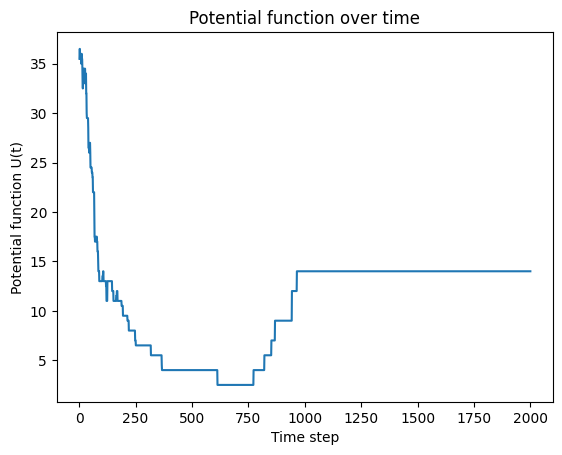

In [21]:
G2, C2, colors2= create_initial_graph()
bands2(2000, 1, 0)

#n equal to the time

If n is equal to the time it is more present the local minimums in the graph, the potential function doesn't decrease gradually, instead arrives to the final value after have having lower values.

{'state': 'cyan'}


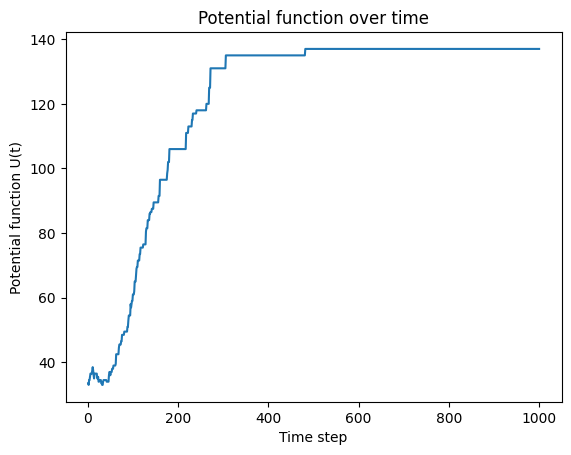

In [22]:
G2, C2, colors2= create_initial_graph()
bands2(1000,0, "static")

#Without n

If n equals 0, the probabilities are the same for all colors, making it impossible to solve the problem.


{'state': 'red'}


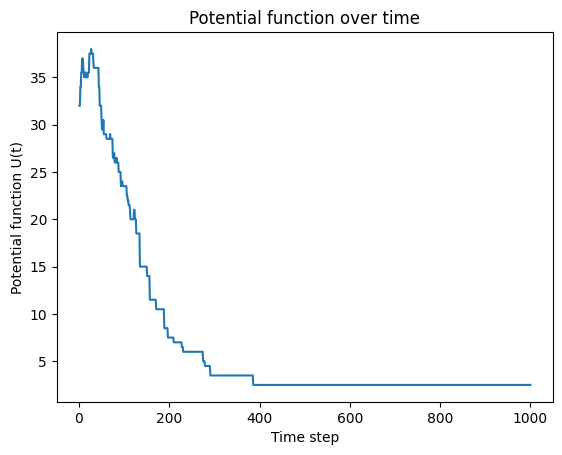

In [23]:
G2, C2, colors2= create_initial_graph()
bands2(1000, 1000, 0)

When n takes smaller values, most of the noise in the potential function occurs at the beginning, approximately within the first 100 time steps. After that, the decreasing behavior becomes more linear.

{'state': 'red'}


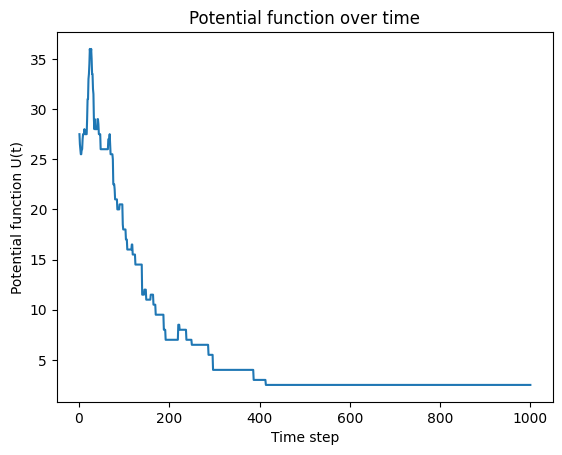

In [24]:
G2, C2, colors2= create_initial_graph()
bands2(1000, 100000, 0)

The smaller the value of n, the lower the noise in the function.